In [1]:
import os
import time
from datetime import datetime

import matplotlib.pyplot as plt

from pyspectrum import Spectrometer, UsbID


In [2]:
# Открываем устройство
device = Spectrometer(UsbID())

# Настройка устройства
device.set_config(
    exposure=2,
    n_times=1000,
    wavelength_calibration_path='data/profile.json',
)

# Чтение темнового сигнала (ячейку нужно выполнять, закрыв спектрометр от света)
device.read_dark_signal(n_times=1000) 

Wavelength calibration loaded


In [3]:
def run_experiment(device: Spectrometer, n_records: int = 60, delay: int = 0, rootdir=os.path.join('.', 'data')) -> None:

    filedir = os.path.join(rootdir, datetime.now().strftime('%Y_%m_%d %H_%M'))
    os.mkdir(filedir)

    for n in range(n_records):
        now = datetime.now().strftime('%Y_%m_%d %H_%M_%S')

        spectrum = device.read()
        spectrum.save(path=os.path.join(filedir, now))

        time.sleep(delay)


In [4]:
run_experiment(
    device=device,
    n_records=1000,
)

RuntimeError: Device read timeout

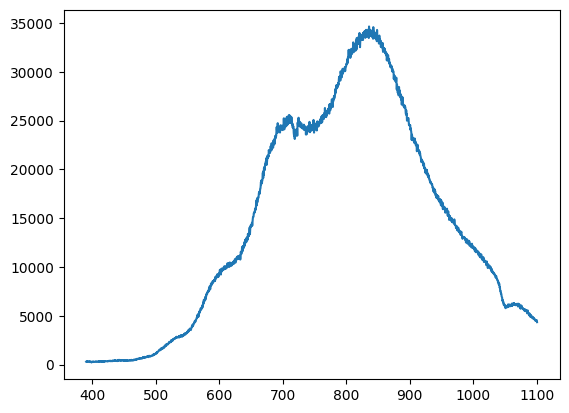

In [13]:
spectrum = device.read()

plt.plot(spectrum.wavelength, spectrum.intensity[0,:])